<a href="https://colab.research.google.com/github/SenolIsci/ML-Model-Starters/blob/main/Reconstruction_LSTM_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconstruction LSTM Autoencoder
The simplest LSTM autoencoder is one that learns to reconstruct each input sequence.

[0.10412654 0.19936755 0.29824623 0.39890534 0.50001436 0.6008024
 0.70091915 0.80032504 0.8992093 ]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 9, 100)           0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 9, 100)            80400     
                                                                 
 time_distributed_2 (TimeDis  (None, 9, 1)             101       
 tributed)                                                       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_____________

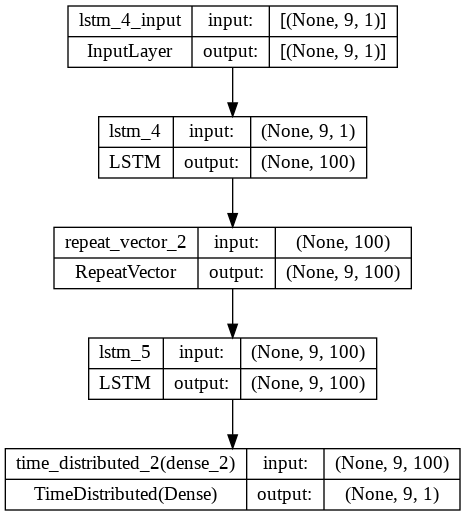

In [5]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])
model.summary()
plot_model(model,show_shapes=True)